In [33]:
import torch 
from torch import nn
import numpy as np
TWOJ_KOD = None 
# TODO: Zaprojektuj sieć neuronową która konsumuje wektory o długości 384 (embeddingi) i zwraca binarną odpowiedź (sigmoid) 
# Pośrednie warstwy niech mają kolejno 150 i 15 neuronów a funkcjami aktywacji niech będzie nn.ReLU 
class ReviewClassifier(nn.Module):
    def __init__(self):
        super().__init__()        
        self.mlp = nn.Sequential(
            nn.Linear(384, 150),
            nn.ReLU(),
            nn.Linear(150, 15),
            nn.ReLU(),
            nn.Linear(15, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):        
        return self.mlp(x)

In [34]:
import pandas as pd 
#TODO: wczytaj zapisane dane z embeddingami 
df = pd.read_feather("allegro_with_embeddings.bin")

In [35]:
df = df.sample(frac=1.0) #shuffle
# TODO: Podziel dane na train, val, test (25k, 5k, reszta) 
train_df = df[:7560]
val_df = df[7560:9030]
test_df = df[9030:]

In [36]:
from torchmetrics import Accuracy
from tqdm.notebook import tqdm 
import numpy as np 
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
model = ReviewClassifier()
bce_loss = nn.BCELoss() # TODO: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

accuracies_per_epoch = []
batch_size = 128
adam_optimizer = torch.optim.Adam(model.parameters()) #TODO: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html [use lr=0.0005]
nr_of_epochs = 450
losses = []
for epoch in tqdm(range(nr_of_epochs)):
    # shuffle 
    train_df = train_df.sample(frac=1.0)
    print(len(train_df))
    current_index = 0 
    while current_index < len(train_df):        
        batch_x = np.array(
            train_df.embeddings[current_index:(current_index + batch_size)].tolist()
        )
        batch_y = np.array(
            train_df.rating[current_index: (current_index + batch_size)].tolist()
        )
        
        tensor_batch_x = torch.Tensor(batch_x)
        tensor_batch_y = torch.Tensor(batch_y).reshape(-1, 1)
        
        pred = model.forward(tensor_batch_x)
        loss = bce_loss(pred, tensor_batch_y)
 
        # Backpropagation
        loss.backward() # Liczenie gradientu wag modelu
        adam_optimizer.step() # adam oblicza nowe parametry sieci 
        adam_optimizer.zero_grad()
        
        current_index += batch_size
        losses.append(float(loss.detach().numpy()))
        
    model.eval()
    metric = Accuracy(task='BINARY')
    for _, eval_row in tqdm(val_df.iterrows(), desc='evaluating'):
        pred = model.forward(
            torch.Tensor(np.array(eval_row.embeddings))
        )
        metric.update(pred, torch.Tensor([eval_row.rating]))
    metric_value = metric.compute()
    accuracies_per_epoch.append(metric_value)
    writer.add_scalar('Accuracy/eval', metric_value, epoch)

        

  0%|          | 0/450 [00:00<?, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

7560


evaluating: 0it [00:00, ?it/s]

In [37]:
from sentence_transformers import SentenceTransformer
sentence_transformer = SentenceTransformer("all-MiniLM-L6-v2")

In [38]:
review = review = """Jonathan Smith's latest novel, *Time in Twilight*, certainly leaves an impression. From the opening chapter, readers are thrust into a world that Smith describes with an abundance of detail that some might find lavish while others could deem excessively verbose. The protagonist, Elara, is as enigmatic as the plot itself; she navigates through her twilight realm with a blend of stoicism and emotiveness that straddles the line between intriguing and puzzling. The pacing of the story might challenge the patience of those accustomed to a brisk narrative, yet for others, it provides a thoughtful, almost meditative examination of themes that resonate deeply in our current era. Smith's stylistic choices, especially his penchant for obscure metaphors, will undoubtedly polarize; they are either strokes of genius or puzzling distractions. Overall, *Time in Twilight* is a book that will be remembered, whether for its ambitious scope or intricate idiosyncrasies."""
encoded_review = sentence_transformer.encode(review)

In [39]:
model.forward(torch.Tensor(encoded_review))

tensor([1.0000], grad_fn=<SigmoidBackward0>)

In [40]:
losses

[0.7063781023025513,
 0.6993188261985779,
 0.6990529894828796,
 0.6950546503067017,
 0.6905796527862549,
 0.6884769201278687,
 0.6842362880706787,
 0.6819925308227539,
 0.678769588470459,
 0.6712930798530579,
 0.6717173457145691,
 0.6682767271995544,
 0.6655288338661194,
 0.6684991121292114,
 0.6478970646858215,
 0.6468738913536072,
 0.6383904814720154,
 0.6541606187820435,
 0.6482610702514648,
 0.6186214685440063,
 0.637718141078949,
 0.6394030451774597,
 0.6409441232681274,
 0.6247542500495911,
 0.6513943672180176,
 0.6125953197479248,
 0.7099012136459351,
 0.599132776260376,
 0.5707987546920776,
 0.6135753393173218,
 0.6383246779441833,
 0.5854511857032776,
 0.5720836520195007,
 0.6834995150566101,
 0.5317826867103577,
 0.6494734287261963,
 0.6021040678024292,
 0.6201967000961304,
 0.5925211906433105,
 0.5877699851989746,
 0.6072400212287903,
 0.6318415403366089,
 0.5498961210250854,
 0.6050230860710144,
 0.5683270692825317,
 0.5564671158790588,
 0.5810663104057312,
 0.5338287949562

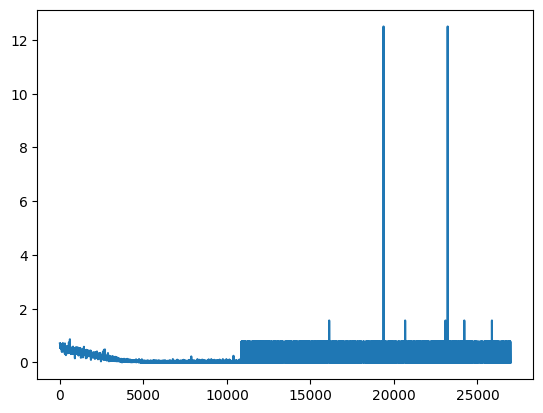

In [41]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()

In [42]:
len(losses)

27000

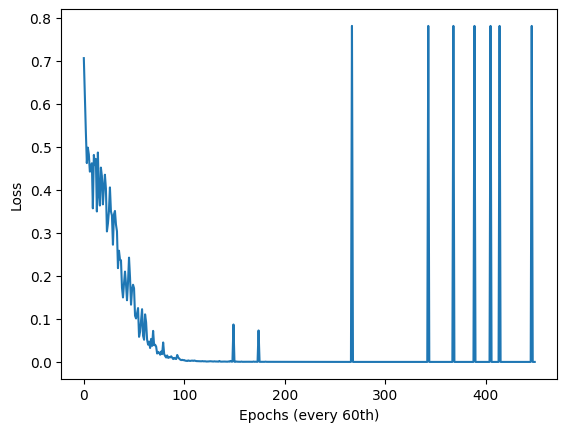

In [43]:
plt.xlabel("Epochs (every 60th)")
plt.ylabel("Loss")
plt.plot(losses[::60])
plt.show()

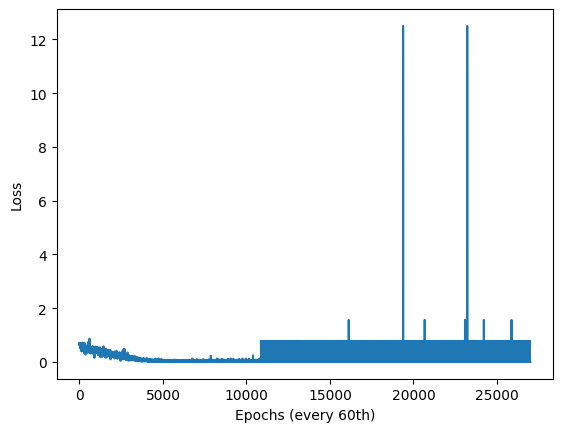

In [44]:
plt.xlabel("Epochs (every 60th)")
plt.ylabel("Loss")
plt.plot(losses)
plt.show()

In [45]:
accuracies_per_epoch

[tensor(0.7082),
 tensor(0.7082),
 tensor(0.7633),
 tensor(0.7626),
 tensor(0.7701),
 tensor(0.7741),
 tensor(0.7653),
 tensor(0.7735),
 tensor(0.7748),
 tensor(0.7782),
 tensor(0.7755),
 tensor(0.7776),
 tensor(0.7823),
 tensor(0.7653),
 tensor(0.7782),
 tensor(0.7850),
 tensor(0.7592),
 tensor(0.7816),
 tensor(0.7823),
 tensor(0.7639),
 tensor(0.7776),
 tensor(0.7741),
 tensor(0.7857),
 tensor(0.7728),
 tensor(0.7796),
 tensor(0.7823),
 tensor(0.7735),
 tensor(0.7816),
 tensor(0.7748),
 tensor(0.7823),
 tensor(0.7776),
 tensor(0.7633),
 tensor(0.7776),
 tensor(0.7707),
 tensor(0.7769),
 tensor(0.7748),
 tensor(0.7571),
 tensor(0.7646),
 tensor(0.7510),
 tensor(0.7667),
 tensor(0.7592),
 tensor(0.7660),
 tensor(0.7524),
 tensor(0.7218),
 tensor(0.7667),
 tensor(0.7558),
 tensor(0.7592),
 tensor(0.7333),
 tensor(0.7599),
 tensor(0.7435),
 tensor(0.7599),
 tensor(0.7517),
 tensor(0.7367),
 tensor(0.7415),
 tensor(0.7463),
 tensor(0.7415),
 tensor(0.7531),
 tensor(0.7612),
 tensor(0.7429

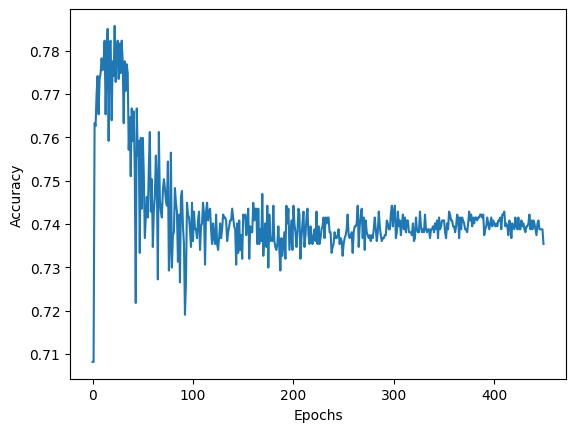

In [46]:
plt.plot([float(acc) for acc in accuracies_per_epoch])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [47]:
empty_model = ReviewClassifier()
print(empty_model)
print(dir(empty_model))
print(list(empty_model.parameters()))

ReviewClassifier(
  (mlp): Sequential(
    (0): Linear(in_features=384, out_features=150, bias=True)
    (1): ReLU()
    (2): Linear(in_features=150, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hoo

In [48]:
1 - 0.2344

0.7656000000000001